Loading 3 datasets:

1. Past Launches for Falcon 9
2. Cores used in the launch vehicles
3. Falcon 9 specifications

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt


#json files were obtained from SpaceX API using Postman to GET the data

with open('f9_pastlaunches', 'r') as file1:
    launch_info_json = json.load(file1)

launch_info = pd.DataFrame(launch_info_json)


with open('coredata', 'r') as file2:
    core_json = json.load(file2)

core_info = pd.DataFrame(core_json)


with open('falcon9specs', 'r') as file3:
    f9_specs_json = json.load(file3)

f9_specs = pd.DataFrame([f9_specs_json])

In [2]:
launchrows, launchcols = launch_info.shape
print(launchrows, launchcols)
column_headings1 = launch_info.columns.tolist()
print("Column headings:", column_headings1)

rock= launch_info['rocket'][45]
rock
# first_stage= rock['first_stage']['cores']
# first_stage[0]['core_serial']

101 31
Column headings: ['flight_number', 'mission_name', 'mission_id', 'launch_year', 'launch_date_unix', 'launch_date_utc', 'launch_date_local', 'is_tentative', 'tentative_max_precision', 'tbd', 'launch_window', 'rocket', 'ships', 'telemetry', 'launch_site', 'launch_success', 'links', 'details', 'upcoming', 'static_fire_date_utc', 'static_fire_date_unix', 'timeline', 'crew', 'launch_failure_details', 'last_date_update', 'last_ll_launch_date', 'last_ll_update', 'last_wiki_launch_date', 'last_wiki_revision', 'last_wiki_update', 'launch_date_source']


{'rocket_id': 'falcon9',
 'rocket_name': 'Falcon 9',
 'rocket_type': 'FT',
 'first_stage': {'cores': [{'core_serial': 'B1035',
    'flight': 2,
    'block': 3,
    'gridfins': True,
    'legs': True,
    'reused': True,
    'land_success': True,
    'landing_intent': True,
    'landing_type': 'RTLS',
    'landing_vehicle': 'LZ-1'}]},
 'second_stage': {'block': 3,
  'payloads': [{'payload_id': 'CRS-13',
    'norad_id': [43060],
    'cap_serial': 'C108',
    'reused': True,
    'customers': ['NASA (CRS)'],
    'nationality': 'United States',
    'manufacturer': 'SpaceX',
    'payload_type': 'Dragon 1.1',
    'payload_mass_kg': 2205,
    'payload_mass_lbs': 4861.2,
    'orbit': 'ISS',
    'orbit_params': {'reference_system': 'geocentric',
     'regime': 'low-earth',
     'longitude': None,
     'semi_major_axis_km': 6657.799,
     'eccentricity': 0.0114283,
     'periapsis_km': 203.576,
     'apoapsis_km': 355.751,
     'inclination_deg': 51.6387,
     'period_min': 90.106,
     'lifespan

In [3]:
core_info

corerows, corecols = core_info.shape

#Prints the number of rows and columns for the core_info df
print(corerows, corecols)

column_headings2 = core_info.columns.tolist()
print("Column headings:", column_headings2)

core_info['water_landing']

69 13
Column headings: ['core_serial', 'block', 'status', 'original_launch', 'original_launch_unix', 'missions', 'reuse_count', 'rtls_attempts', 'rtls_landings', 'asds_attempts', 'asds_landings', 'water_landing', 'details']


0     False
1     False
2     False
3     False
4     False
      ...  
64    False
65    False
66    False
67    False
68    False
Name: water_landing, Length: 69, dtype: bool

In [4]:
f9_specs
specrows, speccols = f9_specs.shape

#Prints the number of rows and columns for the f9_specs df
print(specrows, speccols)

column_headings3 = f9_specs.columns.tolist()
print("Column headings:", column_headings3)

1 23
Column headings: ['id', 'active', 'stages', 'boosters', 'cost_per_launch', 'success_rate_pct', 'first_flight', 'country', 'company', 'height', 'diameter', 'mass', 'payload_weights', 'first_stage', 'second_stage', 'engines', 'landing_legs', 'flickr_images', 'wikipedia', 'description', 'rocket_id', 'rocket_name', 'rocket_type']


DATA WRANGLING

Checking for missing values

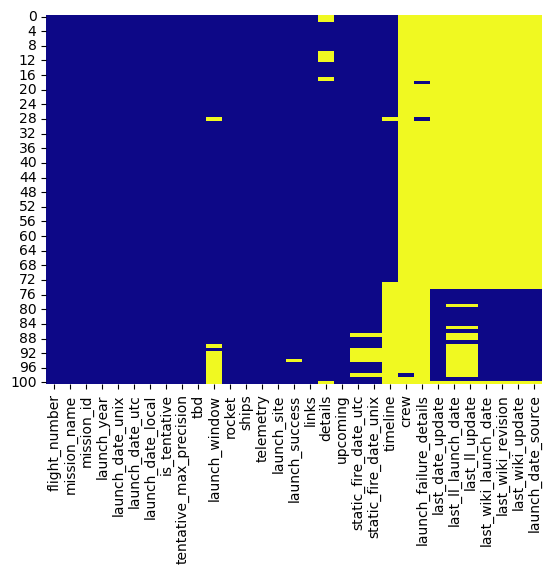

flight_number                0
mission_name                 0
mission_id                   0
launch_year                  0
launch_date_unix             0
launch_date_utc              0
launch_date_local            0
is_tentative                 0
tentative_max_precision      0
tbd                          0
launch_window               11
rocket                       0
ships                        0
telemetry                    0
launch_site                  0
launch_success               1
links                        0
details                      7
upcoming                     0
static_fire_date_utc         6
static_fire_date_unix        6
timeline                    29
crew                       100
launch_failure_details      99
last_date_update            76
last_ll_launch_date         89
last_ll_update              89
last_wiki_launch_date       76
last_wiki_revision          76
last_wiki_update            76
launch_date_source          76
dtype: int64

In [5]:
missing_values1 = launch_info.isnull().sum()
sns.heatmap(launch_info.isnull(), cbar=False, cmap= "plasma")
plt.show()
missing_values1

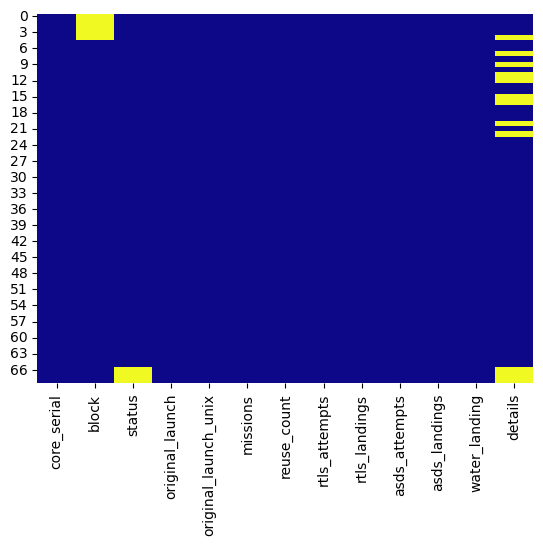

core_serial              0
block                    5
status                   3
original_launch          0
original_launch_unix     0
missions                 0
reuse_count              0
rtls_attempts            0
rtls_landings            0
asds_attempts            0
asds_landings            0
water_landing            0
details                 12
dtype: int64

In [6]:
missing_values2 = core_info.isnull().sum()
sns.heatmap(core_info.isnull(), cbar=False, cmap= "plasma")
plt.show()
missing_values2

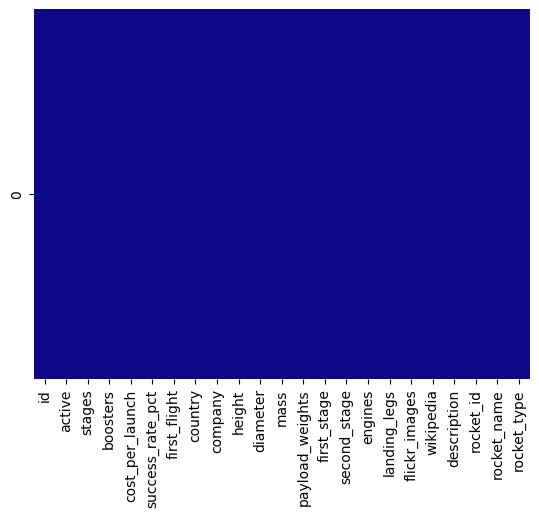

id                  0
active              0
stages              0
boosters            0
cost_per_launch     0
success_rate_pct    0
first_flight        0
country             0
company             0
height              0
diameter            0
mass                0
payload_weights     0
first_stage         0
second_stage        0
engines             0
landing_legs        0
flickr_images       0
wikipedia           0
description         0
rocket_id           0
rocket_name         0
rocket_type         0
dtype: int64

In [7]:
missing_values3 = f9_specs.isnull().sum()
sns.heatmap(f9_specs.isnull(), cbar=False, cmap= "plasma")
plt.show()
missing_values3

Dealing with Missing Values:

- f9_specs does not need any data imputation

- core_info has a few columns with missing values. Columns:block, status and details. Although these aren't needed to perform numerical calculations in the EDA and thus, can be ignored.

- launch_info has many missing columns. All columns after and including crew are not required during the EDA and thus, can be removed. The launch success (label) column has 1 missing value and as this column is essential to the creation of the ML model the best decision to maintain data inetgrity would be to delete that complete row of data. The other columns include launch_window, details, static_fire_date_utc, static_fire_date_unix and timeline are also not essential to the EDA and thus, can be ignored.

Handling launch_info:

In [8]:
launch_info = launch_info.drop(['crew', 'launch_failure_details','last_date_update','last_ll_launch_date','last_ll_update','last_wiki_launch_date','last_wiki_revision','last_wiki_update','launch_date_source'], axis=1)
launch_info

,flight_number,mission_name,mission_id,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,...,ships,telemetry,launch_site,launch_success,links,details,upcoming,static_fire_date_utc,static_fire_date_unix,timeline
0,6,Falcon 9 Test Flight,[EE86F74],2010,1275677100,2010-06-04T18:45:00.000Z,2010-06-04T14:45:00-04:00,False,hour,False,...,[],{'flight_club': None},"{'site_id': 'ccafs_slc_40', 'site_name': 'CCAF...",True,{'mission_patch': 'https://images2.imgbox.com/...,None,False,2010-03-13T00:00:00.000Z,1.268438e+09,"{'webcast_liftoff': 123, 'go_for_prop_loading'..."
1,7,COTS 1,[EE86F74],2010,1291822980,2010-12-08T15:43:00.000Z,2010-12-08T11:43:00-04:00,False,hour,False,...,[AMERICANCHAMPION],{'flight_club': None},"{'site_id': 'ccafs_slc_40', 'site_name': 'CCAF...",True,{'mission_patch': 'https://images2.imgbox.com/...,None,False,2010-12-04T00:00:00.000Z,1.291421e+09,"{'webcast_liftoff': 14, 'go_for_prop_loading':..."
2,8,COTS 2,[EE86F74],2012,1335944640,2012-05-22T07:44:00.000Z,2012-05-22T03:44:00-04:00,False,hour,False,...,[AMERICANCHAMPION],{'flight_club': None},"{'site_id': 'ccafs_slc_40', 'site_name': 'CCAF...",True,{'mission_patch': 'https://images2.imgbox.com/...,"Launch was scrubbed on first attempt, second l...",False,2012-04-30T00:00:00.000Z,1.335744e+09,"{'webcast_liftoff': 42, 'go_for_prop_loading':..."
3,9,CRS-1,[EE86F74],2012,1349656500,2012-10-08T00:35:00.000Z,2012-10-08T20:35:00-04:00,False,hour,False,...,[AMERICANISLANDER],{'flight_club': None},"{'site_id': 'ccafs_slc_40', 'site_name': 'CCAF...",True,{'mission_patch': 'https://images2.imgbox.com/...,"CRS-1 successful, but the secondary payload wa...",False,2012-09-29T00:00:00.000Z,1.348877e+09,"{'webcast_liftoff': 605, 'go_for_prop_loading'..."
4,10,CRS-2,[EE86F74],2013,1362165000,2013-03-01T19:10:00.000Z,2013-03-01T15:10:00-04:00,False,hour,False,...,[AMERICANISLANDER],{'flight_club': None},"{'site_id': 'ccafs_slc_40', 'site_name': 'CCAF...",True,{'mission_patch': 'https://images2.imgbox.com/...,Last launch of the original Falcon 9 v1.0 laun...,False,2013-02-25T18:30:00.000Z,1.361817e+09,"{'webcast_liftoff': 2393, 'go_for_prop_loading..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,105,Starlink-14 (v1.0),[],2020,1603553460,2020-10-24T15:31:00.000Z,2020-10-24T11:31:00-04:00,False,hour,False,...,"[GOMSTREE, GOMSCHIEF, JRTI-2, GOQUEST]",{'flight_club': None},"{'site_id': 'ccafs_slc_40', 'site_name': 'CCAF...",True,{'mission_patch': 'https://images2.imgbox.com/...,This mission will launch the fourteenth batch ...,False,2020-10-21T12:55:00.000Z,1.603285e+09,None
97,106,GPS III SV04 (Sacagawea),[],2020,1604618640,2020-11-05T23:24:00.000Z,2020-11-05T18:24:00-05:00,False,hour,False,...,"[OCISLY, GOQUEST, HAWK]",{'flight_club': None},"{'site_id': 'ccafs_slc_40', 'site_name': 'CCAF...",True,{'mission_patch': 'https://i.imgur.com/Ehe9AgY...,SpaceX will launch GPS Block III Space Vehicle...,False,2020-09-25T05:42:00.000Z,1.601013e+09,None
98,107,Crew-1,[EE86F74],2020,1605486420,2020-11-16T00:27:00.000Z,2020-11-15T19:27:00-05:00,False,hour,False,...,[OCISLY],{'flight_club': None},"{'site_id': 'ksc_lc_39a', 'site_name': 'KSC LC...",True,{'mission_patch': 'https://i.imgur.com/t5R4BAQ...,SpaceX will launch the first operational missi...,False,None,NaN,None
99,108,Sentinel-6 Michael Freilich,[],2020,1605979020,2020-11-21T17:17:00.000Z,2020-11-21T09:17:00-08:00,False,hour,False,...,[],{'flight_club': None},"{'site_id': 'vafb_slc_4e', 'site_name': 'VAFB ...",True,"{'mission_patch': None, 'mission_patch_small':...",SpaceX will launch Sentinel-6 Michael Freilich...,False,2020-11-17T13:17:00.000Z,1.605619e+09,None


In [9]:
missing_launch= launch_info[launch_info['launch_success'].isnull()]
missing_launch

,flight_number,mission_name,mission_id,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,...,ships,telemetry,launch_site,launch_success,links,details,upcoming,static_fire_date_utc,static_fire_date_unix,timeline
94,103,Starlink-12 (v1.0),[],2020,1601983740,2020-10-06T11:29:00.000Z,2020-10-06T07:29:00-04:00,False,hour,False,...,"[GOQUEST, OCISLY, GOMSCHIEF, GOMSTREE]",{'flight_club': None},"{'site_id': 'ksc_lc_39a', 'site_name': 'KSC LC...",None,{'mission_patch': 'https://images2.imgbox.com/...,This mission will launch the twelfth batch of ...,False,None,NaN,None


In [10]:
launch_info = launch_info.drop(94)

EDA
- First, lets looks at how the landing success of a first stage is related to the launch_outcomes of a Falcon 9.

In [11]:
rockets= launch_info['rocket']
rockets= rockets.reset_index()

def extract_land_success(rocket_data):
    if 'first_stage' in rocket_data:
        first_stage_data = rocket_data['first_stage']
        if 'cores' in first_stage_data and len(first_stage_data['cores']) > 0:
            return first_stage_data['cores'][0].get('land_success', None)
    return None

rockets['land_success'] = rockets['rocket'].apply(lambda x: extract_land_success(x))

land_success= rockets['land_success']
launch_success= (launch_info['launch_success'].reset_index())['launch_success']

launch_land= pd.concat([land_success, launch_success], axis=1)
filtered_launch_land= launch_land.dropna(subset=['land_success'])

In [12]:
binary_outcomes = pd.DataFrame()
binary_outcomes['land_success'] = filtered_launch_land['land_success'].apply(lambda x: 1 if x is True else 0)
binary_outcomes['launch_success'] = filtered_launch_land['launch_success'].apply(lambda x: 1 if x is True else 0)
# correlation = binary_outcomes['land_success'].corr(binary_outcomes['launch_success'])
# print(correlation)

In [13]:
filtered_df1 = binary_outcomes[(binary_outcomes['land_success'] == 1) & (binary_outcomes['launch_success'] == 1)]

# Calculate the percentage
percentage = (len(filtered_df1) / len(binary_outcomes[binary_outcomes['launch_success'] == 1])) * 100

# Print the percentage
print(f"Percentage of land_success=1 when launch_success=1: {percentage:.2f}%")

Percentage of land_success=1 when launch_success=1: 86.49%


- As seen above, 86.49% of first_stages land successfully if the Falcon 9 launches successfully.
- As we do not have complete data on the landing_success for each rocket, lets focus on finding correlations and trends that the launch_success shares with various variables:


Launch sites and landing success correlation:

In [14]:
uni= launch_info['launch_site'].str['site_name']
unique_values = uni.unique()
unique_values

array(['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

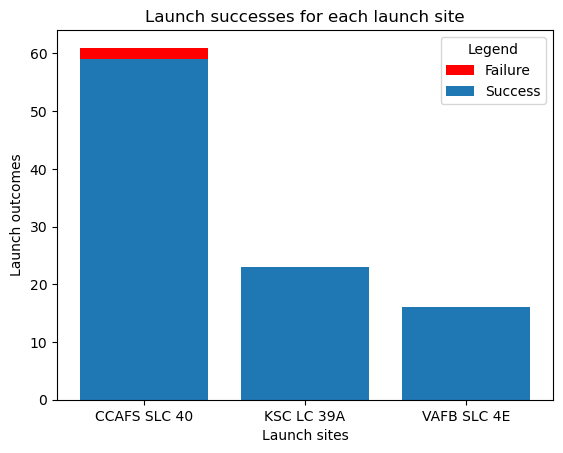

In [54]:
import matplotlib.pyplot as plt

CCAFS_filtered= launch_info[launch_info['launch_site'].str['site_name'] == 'CCAFS SLC 40']
CCAFS_success= CCAFS_filtered['launch_success'] == True
CCAFS_count= len(CCAFS_filtered['launch_success'])
CCAFS_success_count= CCAFS_success.sum()

KSC_filtered= launch_info[launch_info['launch_site'].str['site_name'] == 'KSC LC 39A']
KSC_success= KSC_filtered['launch_success'] == True
KSC_count= len(KSC_filtered['launch_success'])
KSC_success_count= KSC_success.sum()

VAFB_filtered= launch_info[launch_info['launch_site'].str['site_name'] == 'VAFB SLC 4E']
VAFB_success= VAFB_filtered['launch_success'] == True
VAFB_count= len(VAFB_filtered['launch_success'])
VAFB_success_count= VAFB_success.sum()

plt.bar(['CCAFS SLC 40','KSC LC 39A',  'VAFB SLC 4E'], [CCAFS_count, KSC_count, VAFB_count], color='red', label='Failure')
plt.bar(['CCAFS SLC 40','KSC LC 39A',  'VAFB SLC 4E'], [CCAFS_success_count, KSC_success_count, VAFB_success_count], label='Success')

plt.legend(loc='upper right', title='Legend')
plt.xlabel('Launch sites')
plt.ylabel('Launch outcomes')
plt.title('Launch successes for each launch site')

plt.show()

Launch outcomes over time trendline:

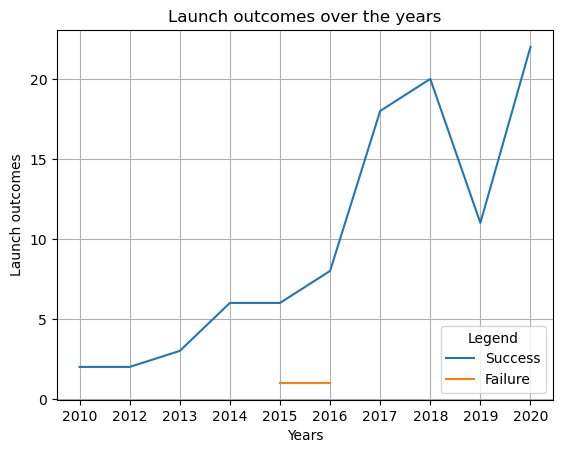

In [45]:
launch_successes= launch_info['launch_success']
launch_year= launch_info['launch_year']

launch_success_count = launch_info[launch_info['launch_success'] == True].groupby('launch_year').size()
launch_success_count= launch_success_count.reset_index()
year_df1= launch_success_count['launch_year']
num_success= launch_success_count[0]


launch_fail_count = launch_info[launch_info['launch_success'] == False].groupby('launch_year').size()
launch_fail_count= launch_fail_count.reset_index()
year_df2= launch_fail_count['launch_year']
num_fail= launch_fail_count[0]

plt.plot(year_df1, num_success, label='Success')
plt.plot(year_df2, num_fail, label='Failure')

plt.legend(loc='lower right', title='Legend')
plt.xlabel('Years')
plt.ylabel('Launch outcomes')
plt.title('Launch outcomes over the years')
plt.grid()
plt.show()

Orbit types and number of successful launches:

In [17]:
def extract_orbit(rocket_data):
    if 'second_stage' in rocket_data:
        second_stage_data = rocket_data['second_stage']
        if 'payloads' in second_stage_data and len(second_stage_data['payloads']) > 0:
            return second_stage_data['payloads'][0].get('orbit', None)
    return None

launch_info['orbit'] = launch_info['rocket'].apply(lambda x: extract_orbit(x))

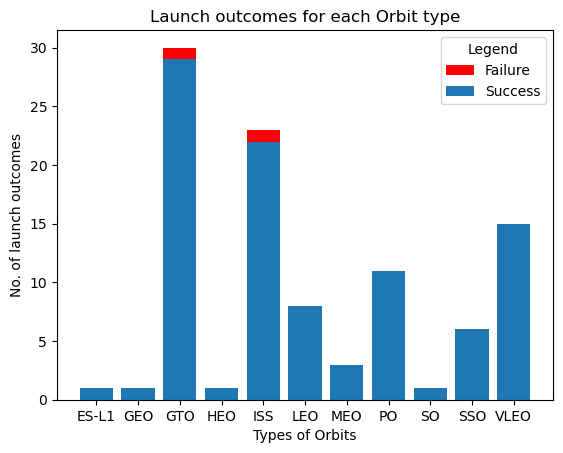

In [48]:
orbit_counts_total = launch_info.groupby('orbit')['launch_success'].count().reset_index()
orbit_counts_success = launch_info[launch_info['launch_success']== True].groupby('orbit')['launch_success'].count().reset_index()

plt.bar(orbit_counts_total['orbit'], orbit_counts_total['launch_success'], color='red', label='Failure')
plt.bar(orbit_counts_success['orbit'], orbit_counts_success['launch_success'], label= 'Success')

plt.legend(loc='upper right', title='Legend')

plt.xlabel('Types of Orbits')
plt.ylabel('No. of launch outcomes')
plt.title('Launch outcomes for each Orbit type')
plt.show()

- GTO has the most successful launches

Core types and successful launches:

In [19]:
def extract_core(rocket_data):
    if 'first_stage' in rocket_data:
        second_stage_data = rocket_data['first_stage']
        if 'cores' in second_stage_data and len(second_stage_data['cores']) > 0:
            return second_stage_data['cores'][0].get('core_serial', None)
    return None

launch_info['cores'] = launch_info['rocket'].apply(lambda x: extract_core(x))

In [20]:
#cores_counts_total = launch_info.groupby('cores')['launch_success'].count().reset_index()
cores_counts_success = launch_info[launch_info['launch_success']== True].groupby('cores')['launch_success'].count().reset_index()
#cores_counts_total= cores_counts_total.sort_values(by='launch_success', ascending=False)
cores_counts_success= cores_counts_success.sort_values(by='launch_success', ascending=False)

In [21]:
cores_counts_success

,cores,launch_success
46,B1049,7
48,B1051,6
45,B1048,5
43,B1046,4
52,B1059,4
50,B1056,4
53,B1060,3
44,B1047,3
42,B1045,2
21,B1021,2


Core B0149 has the highest amount of launch successes.



Payload mass and Launch Success:

In [22]:
def extract_payloadmass(rocket_data):
    if 'second_stage' in rocket_data:
        second_stage_data = rocket_data['second_stage']
        if 'payloads' in second_stage_data and len(second_stage_data['payloads']) > 0:
            return second_stage_data['payloads'][0].get('payload_mass_kg', None)
    return None

launch_info['payload_mass_kg'] = launch_info['rocket'].apply(lambda x: extract_payloadmass(x))

In [23]:
def extract_payloadtype(rocket_data):
    if 'second_stage' in rocket_data:
        second_stage_data = rocket_data['second_stage']
        if 'payloads' in second_stage_data and len(second_stage_data['payloads']) > 0:
            return second_stage_data['payloads'][0].get('payload_type', None)
    return None

launch_info['payload_type'] = launch_info['rocket'].apply(lambda x: extract_payloadtype(x))

In [24]:
payloads= pd.DataFrame()
payloads['payload_mass']= launch_info['payload_mass_kg']
payloads['payload_type']= launch_info['payload_type']
payloads['launch_success']= launch_info['launch_success']
payloads

,payload_mass,payload_type,launch_success
0,NaN,Dragon Boilerplate,True
1,NaN,Dragon 1.0,True
2,525.0,Dragon 1.0,True
3,400.0,Dragon 1.0,True
4,677.0,Dragon 1.0,True
...,...,...,...
96,15400.0,Satellite,True
97,3681.0,Satellite,True
98,NaN,Crew Dragon,True
99,1440.0,Satellite,True


In [25]:
payload_mass_mean = payloads.groupby('payload_type')['payload_mass'].mean(numeric_only=True).reset_index()
payload_mass_mean

,payload_type,payload_mass
0,Crew Dragon,10892.000000
1,Dragon 1.0,534.000000
2,Dragon 1.1,2578.761111
3,Dragon Boilerplate,NaN
4,Satellite,6863.455000


- Payload mass is missing completely at random. Thus, lets use a linear regression model to imputed values for the missing masses:

In [26]:
payloads = payloads.merge(payload_mass_mean, on='payload_type', suffixes=('', '_mean'))
payloads

,payload_mass,payload_type,launch_success,payload_mass_mean
0,NaN,Dragon Boilerplate,True,NaN
1,NaN,Dragon 1.0,True,534.000000
2,525.0,Dragon 1.0,True,534.000000
3,400.0,Dragon 1.0,True,534.000000
4,677.0,Dragon 1.0,True,534.000000
...,...,...,...,...
95,1977.0,Dragon 1.1,True,2578.761111
96,12259.0,Crew Dragon,True,10892.000000
97,NaN,Crew Dragon,True,10892.000000
98,9525.0,Crew Dragon,True,10892.000000


In [27]:
payloads['payload_mass'].fillna(payloads['payload_mass_mean'], inplace=True)

In [28]:
payloads.drop(columns=['payload_mass_mean'], inplace=True)

In [29]:
payloads.dropna(subset=['payload_mass'], inplace=True)

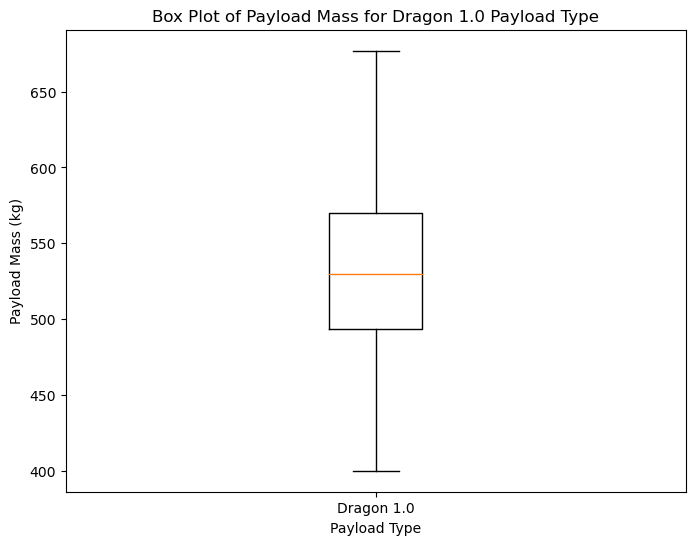

In [55]:
dragon_10_payloads = payloads[payloads['payload_type'] == 'Dragon 1.0']
dragon_10_len= len(dragon_10_payloads)
dragon_10_success= dragon_10_payloads['launch_success'] == True
dragon_10_count= dragon_10_success.sum()

plt.figure(figsize=(8, 6))
plt.boxplot(dragon_10_payloads['payload_mass'])
plt.xlabel('Payload Type')
plt.ylabel('Payload Mass (kg)')
plt.title('Box Plot of Payload Mass for Dragon 1.0 Payload Type')
plt.xticks([1], ['Dragon 1.0'])
plt.show()

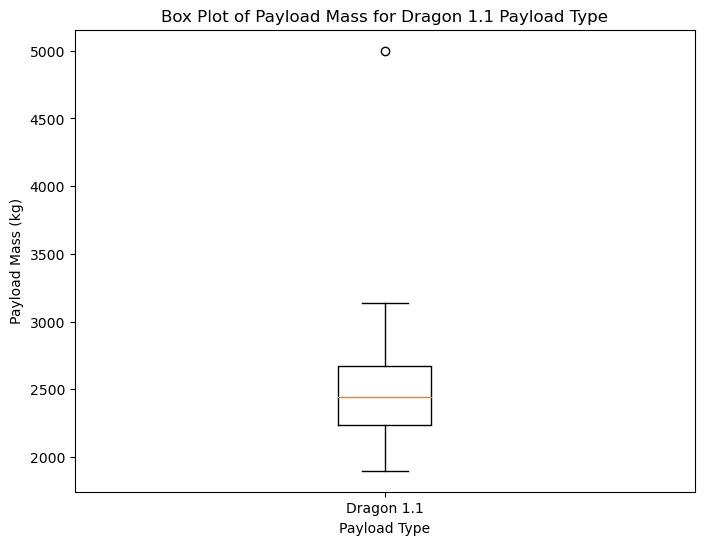

In [56]:
dragon_11_payloads = payloads[payloads['payload_type'] == 'Dragon 1.1']
dragon_11_len= len(dragon_11_payloads)
dragon_11_success= dragon_11_payloads['launch_success'] == True
dragon_11_count= dragon_11_success.sum()

plt.figure(figsize=(8, 6))
plt.boxplot(dragon_11_payloads['payload_mass'])
plt.xlabel('Payload Type')
plt.ylabel('Payload Mass (kg)')
plt.title('Box Plot of Payload Mass for Dragon 1.1 Payload Type')
plt.xticks([1], ['Dragon 1.1'])
plt.show()

In [33]:
max_payload_mass_row_index = dragon_11_payloads['payload_mass'].idxmax()

# Retrieve the row with the maximum payload_mass value
max_payload_mass_row = payloads.loc[max_payload_mass_row_index]

max_payload_mass_row

payload_mass          5000.0
payload_type      Dragon 1.1
launch_success          True
Name: 94, dtype: object

In [61]:
dragon_11_payloads

,payload_mass,payload_type,launch_success
78,2296.0,Dragon 1.1,True
79,2216.0,Dragon 1.1,True
80,2395.0,Dragon 1.1,True
81,1898.0,Dragon 1.1,True
82,2477.0,Dragon 1.1,False
83,3136.0,Dragon 1.1,True
84,2257.0,Dragon 1.1,True
85,2490.0,Dragon 1.1,True
86,2708.0,Dragon 1.1,True
87,2910.0,Dragon 1.1,True


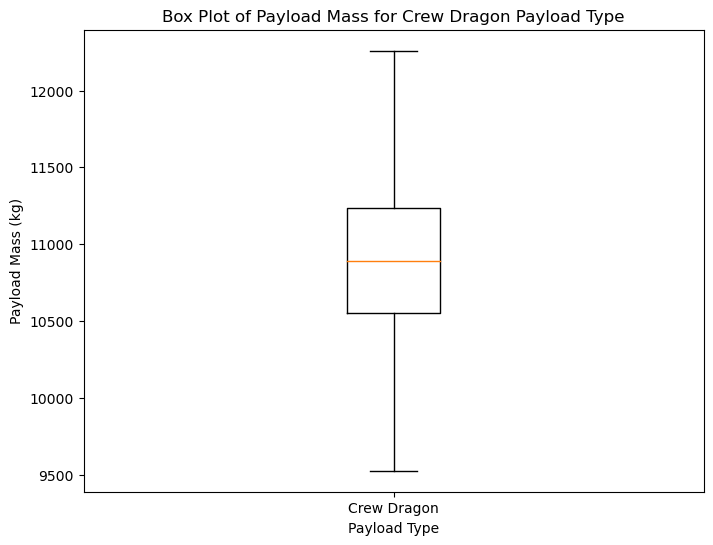

In [57]:
crew_dragon = payloads[payloads['payload_type'] == 'Crew Dragon']
crew_len= len(crew_dragon)
crew_dragon_success= crew_dragon['launch_success'] == True
crew_dragon_count= crew_dragon_success.sum()

plt.figure(figsize=(8, 6))
plt.boxplot(crew_dragon['payload_mass'])
plt.xlabel('Payload Type')
plt.ylabel('Payload Mass (kg)')
plt.title('Box Plot of Payload Mass for Crew Dragon Payload Type')
plt.xticks([1], ['Crew Dragon'])
plt.show()

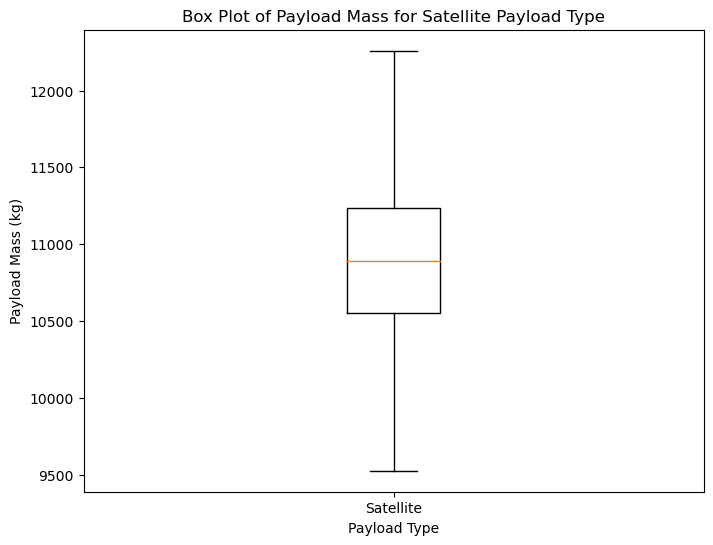

In [58]:
satellite = payloads[payloads['payload_type'] == 'Satellite']
sat_len= len(satellite)
satellite_success= satellite['launch_success'] == True
satellite_count= satellite_success.sum()

plt.figure(figsize=(8, 6))
plt.boxplot(crew_dragon['payload_mass'])
plt.xlabel('Payload Type')
plt.ylabel('Payload Mass (kg)')
plt.title('Box Plot of Payload Mass for Satellite Payload Type')
plt.xticks([1], ['Satellite'])
plt.show()

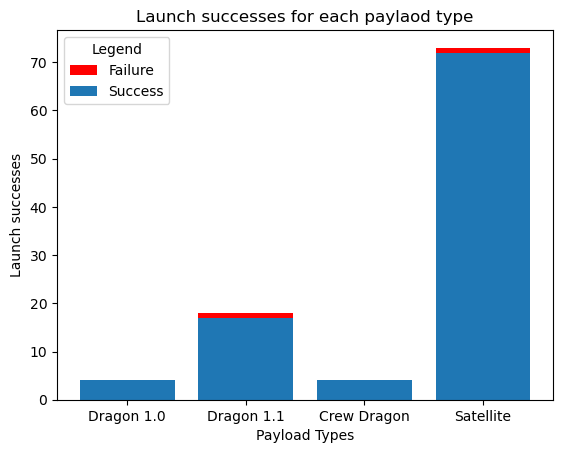

In [59]:
plt.bar(['Dragon 1.0','Dragon 1.1', 'Crew Dragon', 'Satellite'], [dragon_10_len, dragon_11_len, crew_len, sat_len], color='red', label= 'Failure')
plt.bar(['Dragon 1.0','Dragon 1.1', 'Crew Dragon', 'Satellite'], [dragon_10_count, dragon_11_count, crew_dragon_count, satellite_count], label= 'Success')

plt.legend(loc='upper left', title='Legend')
plt.xlabel('Payload Types')
plt.ylabel('Launch successes')
plt.title('Launch successes for each paylaod type')

plt.show()

Interactive Map

There are 3 Launch sites, so we will have three maps:

In [37]:
launch_sites_data= pd.DataFrame()
launch_sites_data['site_name']= ['CCAFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E']
launch_sites_data['hanger_coords_lat']= [28.562106, 28.608389, 34.633]
launch_sites_data['hanger_coords_lon']= [-80.577180, -80.60433, -120.613]
launch_sites_data['markers']= ['red', 'blue', 'green']
launch_sites_data

,site_name,hanger_coords_lat,hanger_coords_lon,markers
0,CCAFS SLC 40,28.562106,-80.57718,red
1,KSC LC 39A,28.608389,-80.60433,blue
2,VAFB SLC 4E,34.633000,-120.61300,green


In [38]:
launch_site_stats=pd.DataFrame()
launch_site_stats['site_name']= launch_info['launch_site'].str['site_name']
launch_site_stats['launch_outcome']= launch_info['launch_success']

# Create a dictionary mapping site names to coordinates
site_coords = dict(zip(launch_sites_data['site_name'], zip(launch_sites_data['hanger_coords_lat'], launch_sites_data['hanger_coords_lon'])))

# Use the map function to add the new columns
launch_site_stats['launch_lat'] = launch_site_stats['site_name'].map(lambda x: site_coords[x][0])
launch_site_stats['launch_lon'] = launch_site_stats['site_name'].map(lambda x: site_coords[x][1])

launch_site_stats



,site_name,launch_outcome,launch_lat,launch_lon
0,CCAFS SLC 40,True,28.562106,-80.57718
1,CCAFS SLC 40,True,28.562106,-80.57718
2,CCAFS SLC 40,True,28.562106,-80.57718
3,CCAFS SLC 40,True,28.562106,-80.57718
4,CCAFS SLC 40,True,28.562106,-80.57718
...,...,...,...,...
96,CCAFS SLC 40,True,28.562106,-80.57718
97,CCAFS SLC 40,True,28.562106,-80.57718
98,KSC LC 39A,True,28.608389,-80.60433
99,VAFB SLC 4E,True,34.633000,-120.61300


In [62]:
import folium
from IPython.display import IFrame
from folium import plugins

# Create a Folium map centered at a specific location
launch_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add circles and labels for launch sites with different colors
for index, launch_site in launch_sites_data.iterrows():
    # Get latitude and longitude of the launch site
    site_lat, site_lon = launch_site['hanger_coords_lat'], launch_site['hanger_coords_lon']

    # Create a circle with a radius (e.g., 1000 meters) and color
    circle = folium.Circle(location=[site_lat, site_lon], radius=300, color=launch_site['markers'], fill=True)
    circle.add_to(launch_map)

    # Add a label as a marker with the same color
    marker = folium.Marker(location=[site_lat, site_lon], popup=launch_site['site_name'], 
                           icon=folium.Icon(color=launch_site['markers']))
    marker.add_to(launch_map)
    
    
# Create marker clusters for successful and failed launches
success_cluster = plugins.MarkerCluster(name='Successful Launches')
failed_cluster = plugins.MarkerCluster(name='Failed Launches')

for index, launch in launch_site_stats.iterrows():
#     launch_site = launch_sites_data.iloc[index]  # Get the corresponding launch site info
    
    if launch['launch_outcome']:
        marker = folium.Marker(location=[launch['launch_lat']-0.00005, launch['launch_lon']-0.00005], 
                               popup='Successful Launch', 
                               icon=folium.Icon(color='green'))
        marker.add_to(success_cluster)
    else:
        marker = folium.Marker(location=[launch['launch_lat']+0.00005, launch['launch_lon']+0.00005], 
                               popup='Failed Launch',
                               icon=folium.Icon(color='red'))
        marker.add_to(failed_cluster)

        
# Add clusters to the map
success_cluster.add_to(launch_map)
failed_cluster.add_to(launch_map)

coastline_coords1 = [(28.545209, -80.564853), (28.572951, -80.569660), (28.588478, -80.576183), (28.607317, -80.593435), (28.621031, -80.604765)]  
coastline_line = folium.PolyLine(locations=coastline_coords1, color='purple', weight=3, popup='Coastline')
coastline_line.add_to(launch_map)

coastline_coords2 = [(34.658572, -120.616325), (34.639366, -120.624221), (34.614788, -120.635894)]
coastline_line = folium.PolyLine(locations=coastline_coords2, color='purple', weight=3, popup='Coastline')
coastline_line.add_to(launch_map)

closest_airport_coords1 = (34.66722754265699, -120.46055495836703)
closest_airport_coords2 = (28.802412962985763, -81.23703008375793)  
closest_city_coords1= (28.535982057041718, -81.37701663538485)
closest_city_coords2= (34.05123647486518, -118.28156143070927)

# Add a marker for the closest city on the map
folium.Marker(location=closest_airport_coords1, popup='Closest commercial airport').add_to(launch_map)
folium.Marker(location=closest_airport_coords2, popup='Closest commercial airport').add_to(launch_map)
folium.Marker(location=closest_city_coords1, popup='Closest major city').add_to(launch_map)
folium.Marker(location=closest_city_coords2, popup='Closest major city').add_to(launch_map)

# Display the map
launch_map.save('launch_sites_map.html')

iframe = IFrame(src='launch_sites_map.html', width='100%', height='500px')
display(iframe)